#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks.
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import wandb


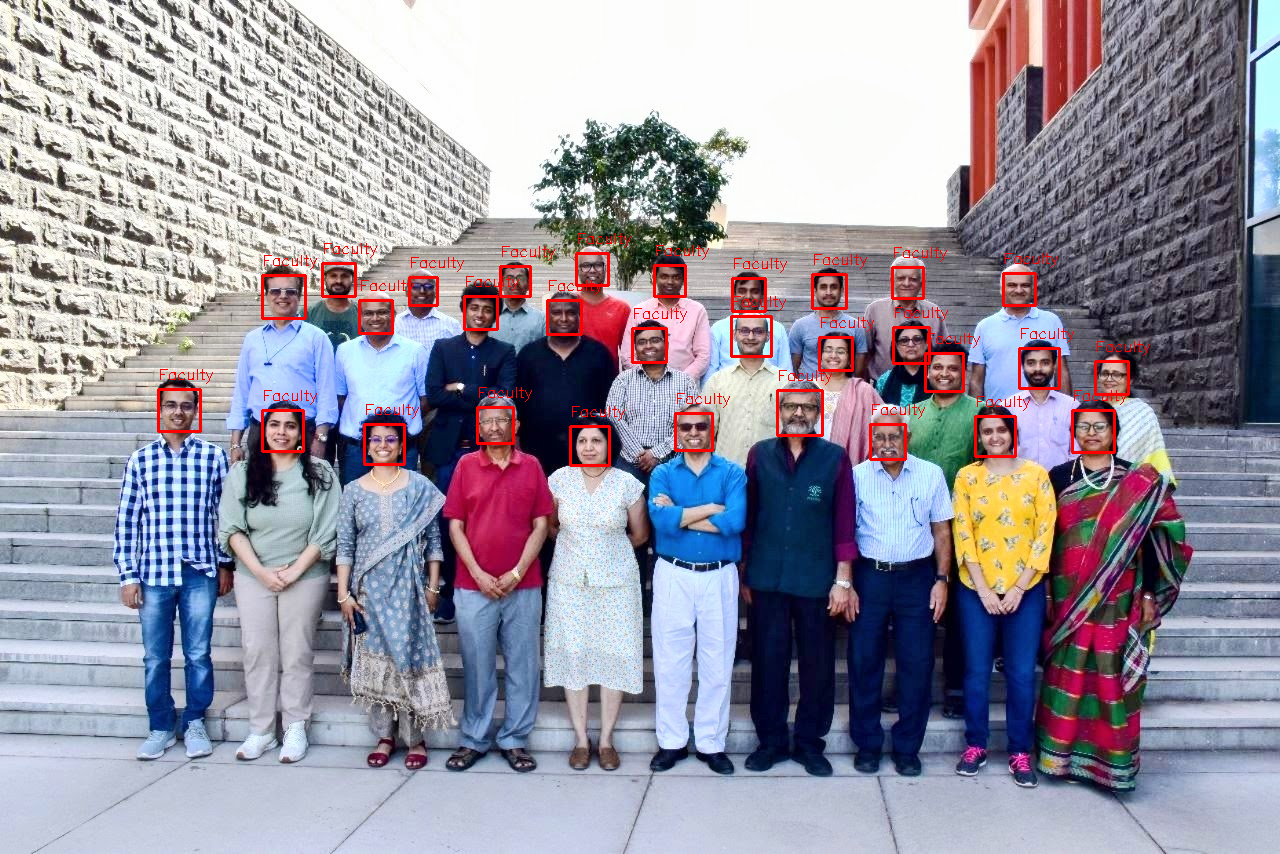

Number of faces 30


In [ ]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('Plaksha Faculty Lab 5.jpg')

## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Applying the face detection method on the grayscale image.
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

# Define the text and font parameters
text = 'Faculty'  ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)

## Display the image and window title should be "Total number of face detected are #"
cv2_imshow(img)
print("Number of faces", len(faces_rect))
cv2.waitKey(0)
cv2.destroyAllWindows()


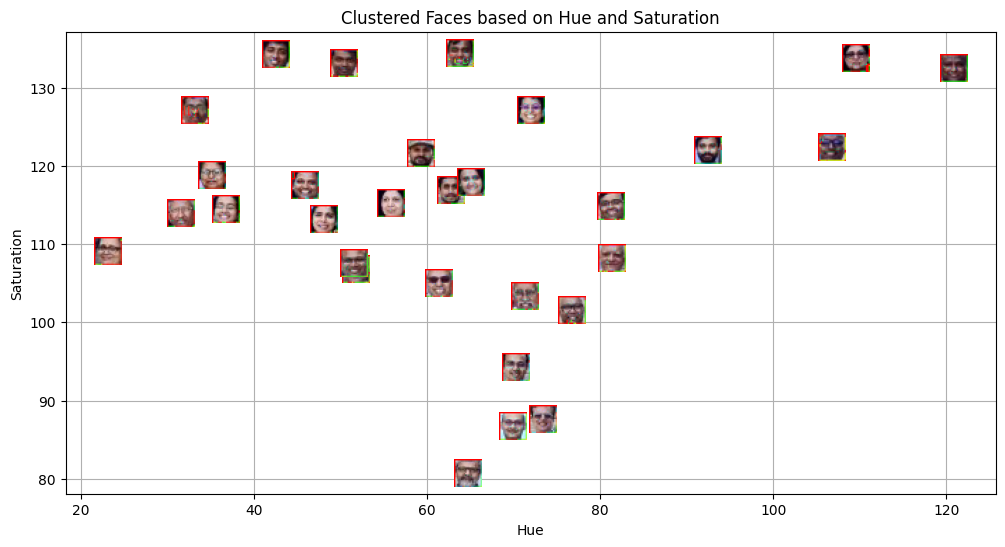

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # Convert the img from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(hue_saturation)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o')

# Put x label
plt.xlabel('Hue')
# Put y label
plt.ylabel('Saturation')
# Put title
plt.title('Clustered Faces based on Hue and Saturation')
# Put grid
plt.grid(True)
# Show the plot
plt.show()

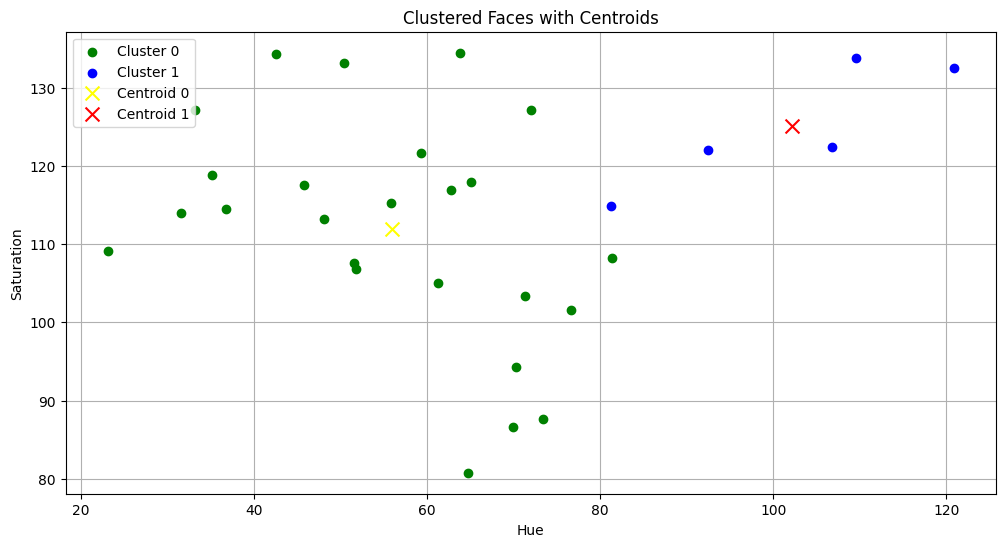

In [ ]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1
plt.scatter(centroid_0[0], centroid_0[1], c='yellow', marker='x', s=100, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], c='red', marker='x', s=100, label='Centroid 1')

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Clustered Faces with Centroids')
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## Show the plot
plt.show()


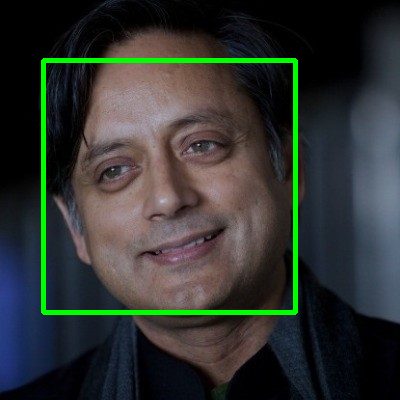

In [ ]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Shashi Tharoor Lab 5.jpg')

# Convert the template image to grayscale
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

# Detect face in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(template_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2_imshow(template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

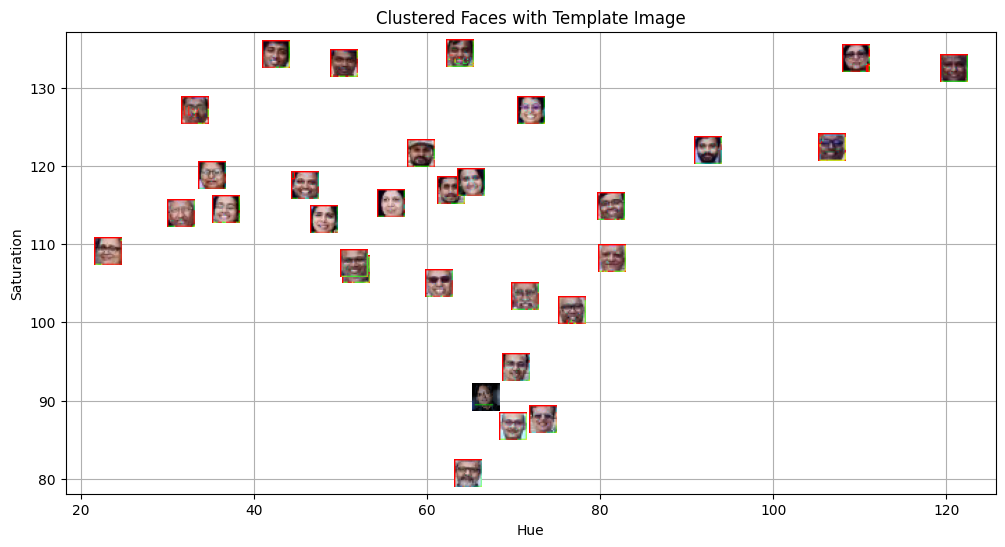

In [ ]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

# Put x label
plt.xlabel('Hue')
# Put y label
plt.ylabel('Saturation')
# Put title
plt.title('Clustered Faces with Template Image')
# Add grid
plt.grid(True)
# Show plot
plt.show()

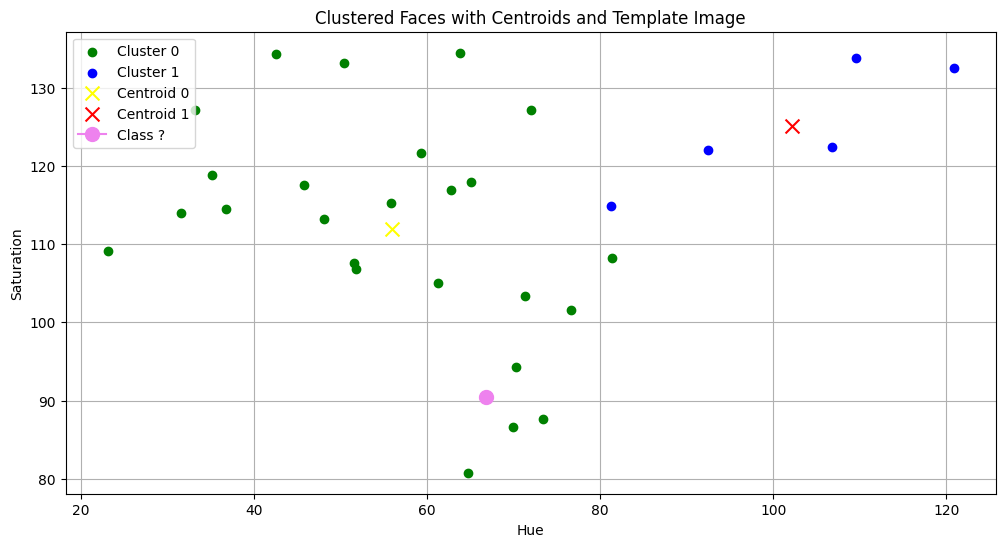

In [ ]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], c='yellow', marker='x', s=100, label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='red', marker='x', s=100, label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Class ?')

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Clustered Faces with Centroids and Template Image')
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## show the plot
plt.show()

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms?

  -> Euclidean Distance: Computes straight-line distance and is applied typically in KNN and clustering.
Manhattan Distance: Computes the total absolute difference between points.
Minkowski Distance: Generalization of Euclidean and Manhattan distances.
Cosine Similarity/Distance: Computes the angle between two vectors, used typically in text and recommendation systems.
Hamming Distance: Computed as the number of differing elements in categorical or binary information.
Mahalanobis Distance: Also considers correlations within the data and scales distances by it.



#### 2. What are some real-world applications of distance-based classification algorithms?

  -> Healthcare: Forecasting diseases from patient symptoms or medical histories.
Recommender Systems: Detecting similar users or products to recommend.
Image Recognition: Detecting objects, faces, or features in pictures.
Fraud Detection: Detecting anomalies in transaction patterns.
Document Classification: Clustering documents or emails by similarity.
Retail: Segmentation of customers and purchase behavior prediction.
Sports Analytics: Comparing player performances or team tactics.

#### 3. Explain various distance metrics.

  -> Euclidean Distance: Tracks straight-line distance and is optimal for numeric data.
Manhattan Distance: Returns the sum of absolute differences and is optimal for grid-like data.
Minkowski Distance: Generalizes different types of distance depending on a parameter.
Cosine Similarity: Measures vector similarity in high-dimensional spaces.
Hamming Distance: Counts category or binary data differences.
Mahalanobis Distance: Addresses correlations and scales with variance.

#### 4. What is the role of cross validation in model performance?

  -> Guarantees the model to perform well on new data by dividing it into training and testing sets.
Reduces overfitting risk by measuring performance on various data splits.
Assists in choosing the optimal parameters, e.g., the number of neighbors in KNN.

#### 5. Explain variance and bias in terms of KNN?

  -> Bias: Indicates the degree to which the model oversimplifies the data. KNN has low bias as it uses actual data points. Very small k values, though, can cause overfitting of the data.
Variance: Shows how much the model's predictions vary with varying training data. Small k values create high variance as the model is sensitive to noise. Large k values decrease variance but may oversimplify the data.
Trade-Off: Choosing the right k balances bias and variance, ensuring better generalization.

In [ ]:
import wandb
wandb.login(key="eaa1be5ef1509da7e5251e6a20f37079abe8a3ef")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import wandb
# Read the images
plot1 = cv2.imread("plot1.png")
plot2 = cv2.imread("plot2.png")
plot3 = cv2.imread("plot3.png")
plot4 = cv2.imread("plot4.png")
shashi = cv2.imread("shashi.png")

# Convert images from BGR (OpenCV format) to RGB (for correct visualization)
plot1 = cv2.cvtColor(plot1, cv2.COLOR_BGR2RGB)
plot2 = cv2.cvtColor(plot2, cv2.COLOR_BGR2RGB)
plot3 = cv2.cvtColor(plot3, cv2.COLOR_BGR2RGB)
plot4 = cv2.cvtColor(plot4, cv2.COLOR_BGR2RGB)
shashi = cv2.cvtColor(shashi, cv2.COLOR_BGR2RGB)

# Log the images to wandb
wandb.log({"Plot 1": wandb.Image(plot1)})
wandb.log({"Plot 2": wandb.Image(plot2)})
wandb.log({"Plot 3": wandb.Image(plot3)})
wandb.log({"Plot 4": wandb.Image(plot4)})
wandb.log({"Shashi Image": wandb.Image(shashi)})